# MSikos Achievement 2 Exercise 2.3: Fundamentals of Visualization Libraries Part 1

## 1. Install libraries, set system path, and import dataset from prior exercise

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import os
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime as dt

In [3]:
# Set system path

path = r'C:\Users\Stony\OneDrive\CareerFoundry\Data Specialization Course\envs\Citi-Bike'

In [4]:
# Import dataset from prior exercise

df_filtered = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'filtered_data.csv'), index_col = 0)

C:\Users\Stony\AppData\Local\Temp\ipykernel_8648\612698117.py:3: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_filtered = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'filtered_data.csv'), index_col = 0)


In [5]:
# Validate dataframe created successfully

df_filtered.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp'],
      dtype='object')

## 2. Clean and verify the dataframe

In [6]:
# Verify structure of dataframe

df_filtered.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp
0,BFD29218AB271154,electric_bike,2022-01-21 13:13:43.392,2022-01-21 13:22:31.463,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802117,-73.968181,40.804038,-73.945925,member,2022-01-21,-6.0
1,7C953F2FD7BE1302,classic_bike,2022-01-10 11:30:54.162,2022-01-10 11:41:43.422,4 Ave & 3 St,4028.04,Boerum Pl\t& Pacific St,4488.09,40.673746,-73.985649,40.688489,-73.991160,member,2022-01-10,1.6
2,95893ABD40CED4B8,electric_bike,2022-01-26 10:52:43.096,2022-01-26 11:06:35.227,1 Ave & E 62 St,6753.08,5 Ave & E 29 St,6248.06,40.761227,-73.960940,40.745168,-73.986831,member,2022-01-26,-2.3
3,F853B50772137378,classic_bike,2022-01-03 08:35:48.247,2022-01-03 09:10:50.475,2 Ave & E 96 St,7338.02,5 Ave & E 29 St,6248.06,40.783964,-73.947167,40.745168,-73.986831,member,2022-01-03,1.4
4,7590ADF834797B4B,classic_bike,2022-01-22 14:14:23.043,2022-01-22 14:34:57.474,6 Ave & W 34 St,6364.1,5 Ave & E 29 St,6248.06,40.749640,-73.988050,40.745168,-73.986831,member,2022-01-22,-5.9


In [7]:
df_filtered.shape

(29838166, 15)

In [8]:
df_filtered.count

<bound method DataFrame.count of                    ride_id  rideable_type               started_at  \
0         BFD29218AB271154  electric_bike  2022-01-21 13:13:43.392   
1         7C953F2FD7BE1302   classic_bike  2022-01-10 11:30:54.162   
2         95893ABD40CED4B8  electric_bike  2022-01-26 10:52:43.096   
3         F853B50772137378   classic_bike  2022-01-03 08:35:48.247   
4         7590ADF834797B4B   classic_bike  2022-01-22 14:14:23.043   
...                    ...            ...                      ...   
29838801  1F223EDAFF420AE3  electric_bike  2022-12-01 20:26:45.847   
29838802  CFA5C560ACB73B8E   classic_bike  2022-12-26 13:46:34.237   
29838803  11C8C5E0DB947B07   classic_bike  2022-12-01 05:56:14.903   
29838804  5B9B083C534A5964   classic_bike  2022-12-02 11:54:15.871   
29838805  91C286C462F89A50   classic_bike  2022-12-18 13:35:22.574   

                         ended_at        start_station_name start_station_id  \
0         2022-01-21 13:22:31.463   West End A

In [9]:
# Convert date columns date, started_at, and ended_at from object into datetime format

df_filtered['date'] = pd.to_datetime(df_filtered['date'])
df_filtered['started_at'] = pd.to_datetime(df_filtered['started_at'])
df_filtered['ended_at'] = pd.to_datetime(df_filtered['ended_at'])

In [10]:
# Verify data from 2021 was dropped successfully

df_filtered.groupby(df_filtered.date.dt.year)['started_at'].count()

date
2022    29838166
Name: started_at, dtype: int64

In [11]:
# Verify format converted successfully

df_filtered.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
date                  datetime64[ns]
avgTemp                      float64
dtype: object

In [12]:
df_filtered.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp
0,BFD29218AB271154,electric_bike,2022-01-21 13:13:43.392,2022-01-21 13:22:31.463,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802117,-73.968181,40.804038,-73.945925,member,2022-01-21,-6.0
1,7C953F2FD7BE1302,classic_bike,2022-01-10 11:30:54.162,2022-01-10 11:41:43.422,4 Ave & 3 St,4028.04,Boerum Pl\t& Pacific St,4488.09,40.673746,-73.985649,40.688489,-73.991160,member,2022-01-10,1.6
2,95893ABD40CED4B8,electric_bike,2022-01-26 10:52:43.096,2022-01-26 11:06:35.227,1 Ave & E 62 St,6753.08,5 Ave & E 29 St,6248.06,40.761227,-73.960940,40.745168,-73.986831,member,2022-01-26,-2.3
3,F853B50772137378,classic_bike,2022-01-03 08:35:48.247,2022-01-03 09:10:50.475,2 Ave & E 96 St,7338.02,5 Ave & E 29 St,6248.06,40.783964,-73.947167,40.745168,-73.986831,member,2022-01-03,1.4
4,7590ADF834797B4B,classic_bike,2022-01-22 14:14:23.043,2022-01-22 14:34:57.474,6 Ave & W 34 St,6364.1,5 Ave & E 29 St,6248.06,40.749640,-73.988050,40.745168,-73.986831,member,2022-01-22,-5.9


## 3. Create a plot using pandas

In [13]:
df_filtered.sort_values(by=['date'])

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp
337491,FB33E3D8F21E2941,electric_bike,2022-01-01 01:49:37.374,2022-01-01 01:57:50.346,Canal St & Rutgers St,5303.08,Norfolk St & Broome St,5374.01,40.714275,-73.989900,40.717227,-73.988021,casual,2022-01-01,11.6
934741,755337295F178067,electric_bike,2022-01-01 03:21:09.754,2022-01-01 03:49:33.047,Lewis Ave & Madison St,4425.02,Columbia St & Degraw St,4422.04,40.686312,-73.935775,40.685930,-74.002424,member,2022-01-01,11.6
227204,C62CA87E3A475ADD,classic_bike,2022-01-01 08:38:18.156,2022-01-01 08:47:54.213,Carlton Ave & Park Ave,4732.04,Emerson Pl & Myrtle Ave,4683.02,40.695807,-73.973556,40.693631,-73.962236,casual,2022-01-01,11.6
913722,CD7A2098AFCD5514,classic_bike,2022-01-01 10:33:58.529,2022-01-01 10:47:05.197,W 100 St & Broadway,7580.01,W 67 St & Broadway,7116.04,40.797372,-73.970412,40.774925,-73.982666,casual,2022-01-01,11.6
127371,3F9E0C51F49F78A3,electric_bike,2022-01-01 20:05:19.592,2022-01-01 20:12:00.661,W 18 St & 6 Ave,6064.08,W 42 St & 6 Ave,6517.08,40.739713,-73.994564,40.754920,-73.984550,member,2022-01-01,11.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28674651,048F372A8932AF74,classic_bike,2022-12-31 09:42:43.255,2022-12-31 09:53:40.001,Franklin St & W Broadway,5430.08,W 25 St & 6 Ave,6215.04,40.719116,-74.006667,40.743954,-73.991449,member,2022-12-31,8.2
28818214,96B836FC53F5B659,electric_bike,2022-12-31 12:43:53.932,2022-12-31 12:49:30.908,Eastern Pkwy & Franklin Ave,3919.07,Monroe St & Classon Ave,4336.01,40.670777,-73.957680,40.684568,-73.958811,member,2022-12-31,8.2
29544721,757B088CF96FCBE1,electric_bike,2022-12-31 16:52:05.623,2022-12-31 16:56:09.677,W 63 St & Broadway,7052.01,W 53 St & 10 Ave,6890.01,40.771597,-73.982601,40.766697,-73.990617,member,2022-12-31,8.2
28331380,8F4E623EA5E0FF21,classic_bike,2022-12-31 19:09:13.320,2022-12-31 19:15:34.353,E 82 St & East End Ave,7049.04,E 78 St & 2 Ave,7057.07,40.772461,-73.946821,40.772797,-73.955778,member,2022-12-31,8.2


In [14]:
# Create a temporary dataframe using the date column from the merged dataframe


df_temp = df_filtered.set_index('date')
df_temp.sort_index(inplace=True)
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp
date,,,,,,,,,,,,,,
2022-01-01,FB33E3D8F21E2941,electric_bike,2022-01-01 01:49:37.374,2022-01-01 01:57:50.346,Canal St & Rutgers St,5303.08,Norfolk St & Broome St,5374.01,40.714275,-73.989900,40.717227,-73.988021,casual,11.6
2022-01-01,755337295F178067,electric_bike,2022-01-01 03:21:09.754,2022-01-01 03:49:33.047,Lewis Ave & Madison St,4425.02,Columbia St & Degraw St,4422.04,40.686312,-73.935775,40.685930,-74.002424,member,11.6
2022-01-01,C62CA87E3A475ADD,classic_bike,2022-01-01 08:38:18.156,2022-01-01 08:47:54.213,Carlton Ave & Park Ave,4732.04,Emerson Pl & Myrtle Ave,4683.02,40.695807,-73.973556,40.693631,-73.962236,casual,11.6
2022-01-01,CD7A2098AFCD5514,classic_bike,2022-01-01 10:33:58.529,2022-01-01 10:47:05.197,W 100 St & Broadway,7580.01,W 67 St & Broadway,7116.04,40.797372,-73.970412,40.774925,-73.982666,casual,11.6
2022-01-01,3F9E0C51F49F78A3,electric_bike,2022-01-01 20:05:19.592,2022-01-01 20:12:00.661,W 18 St & 6 Ave,6064.08,W 42 St & 6 Ave,6517.08,40.739713,-73.994564,40.754920,-73.984550,member,11.6


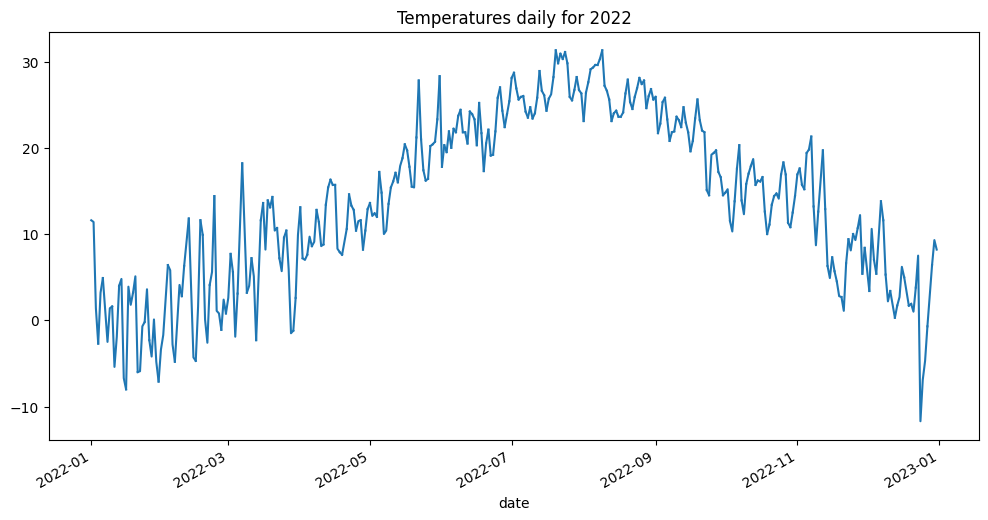

In [15]:
# Set the value of agg.path.chunksize to a number greater than 100
plt.rcParams['agg.path.chunksize'] = 100000

# adjusting the path simplification threshold
plt.rcParams['path.simplify_threshold'] = 1.0

# Set the figure size to make the plot wider
plt.figure(figsize=(12, 6))  
plt.title('Temperatures daily for 2022')

# plotting the data
df_temp['avgTemp'].plot()
plt.show()

## 4. Create a new column "Count of trips" and merge with existing dataframe

In [16]:
df_temp.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp'],
      dtype='object')

In [17]:
# Groupby the count of the trips 

df_group = pd.DataFrame(df_temp.groupby(['date'])['ride_id'].count()).reset_index()

In [18]:
df_group.rename(columns = {'ride_id':'bike_rides_daily'}, inplace = True)

In [19]:
df_group.columns

Index(['date', 'bike_rides_daily'], dtype='object')

In [20]:
df = df_filtered.merge(df_group, on = "date", how = 'outer', indicator = True)
print(df['_merge'].value_counts(dropna = False))
print("Shape of January 1st is", df[df['date'] == '2022-01-01'].shape) # Check 
print("Shape of January 2nd is", df[df['date'] == '2022-01-02'].shape) # Second check 

df_temp = df.set_index('date')

print(df_temp.columns)

_merge
both          29838166
left_only            0
right_only           0
Name: count, dtype: int64
Shape of January 1st is (20428, 17)
Shape of January 2nd is (43009, 17)
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', 'bike_rides_daily', '_merge'],
      dtype='object')


## 5. Plotting rides per day and temperature

### Initial plot

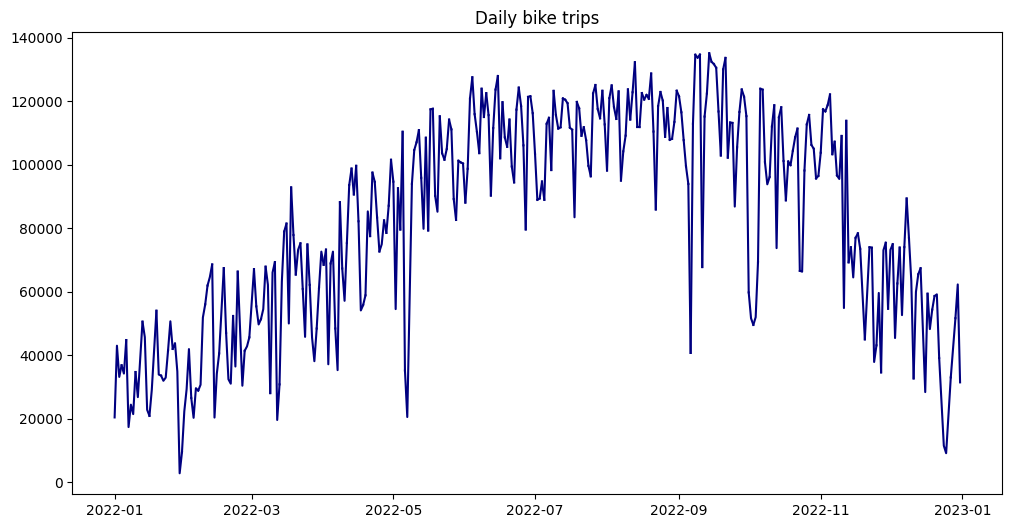

In [21]:
# first try the plot of the bike rides

plt.figure(figsize=(12,6))
plt.title('Daily bike trips')
plt.plot(df_temp['bike_rides_daily'], color = 'navy')
plt.show()

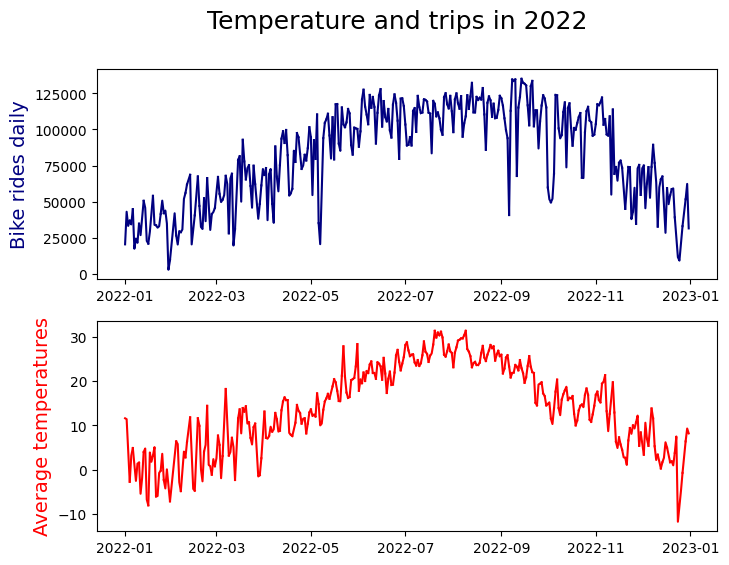

In [22]:
# Create figure and axis objects with subplots() and details

fig,ax = plt.subplots(2, figsize =(8, 6))

# Make a plot of the bike rides
ax[0].plot(df_temp['bike_rides_daily'],color = "navy")
ax[0].set_ylabel("Bike rides daily",color = "navy", fontsize = 14) # set y-axis label

# Make a plot with the temperatues on the y-axis using second axis object
ax[1].plot(df_temp["avgTemp"], color = "red")
ax[1].set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.suptitle('Temperature and trips in 2022', fontsize = 18)

plt.show()

In [23]:
# save the plot as a file

fig.savefig(os.path.join(path, '04 Analysis', 'trips_temperatures_dual_line.jpg'),
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

To create the visualization above, I decided to create a plot and subplot to keep the average temperature and number of rides seperate. The first line in the code creates the subplot, the number of plots and the size plots should be. The lines with ax[0] sets the data to be plotted on the y-axis, which is the number of bike rides per month and the legend for the axis. Lines with ax[1] refer to the second plot and define the data points to be plotted as well as the legend for the y-axis. The title for the both subplots was created using the plt.suptitle code.

In [24]:
# Export merged dataframe
df_temp.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'cleaned_data.csv'))

# Bonus Task

In [25]:
# Verify columns in dataframe and ensure the date column is sorted appropriately

df_temp

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,bike_rides_daily,_merge
date,,,,,,,,,,,,,,,,
2022-01-01,4A091640AEC83471,classic_bike,2022-01-01 16:01:22.082,2022-01-01 16:05:11.986,S 4 St & Wythe Ave,5204.05,Kent Ave & S 11 St,5062.01,40.712859,-73.965903,40.707645,-73.968415,member,11.6,20428,both
2022-01-01,7A560D6287C00126,classic_bike,2022-01-01 14:07:04.344,2022-01-01 14:31:57.500,Lexington Ave & E 120 St,7652.04,Amsterdam Ave & W 125 St,7800.03,40.801307,-73.939817,40.813358,-73.956461,member,11.6,20428,both
2022-01-01,4F6F726B809C15E4,classic_bike,2022-01-01 12:02:26.943,2022-01-01 12:14:13.555,Lexington Ave & E 120 St,7652.04,Amsterdam Ave & W 125 St,7800.03,40.801307,-73.939817,40.813358,-73.956461,member,11.6,20428,both
2022-01-01,3BC10DC94FD79955,classic_bike,2022-01-01 22:53:23.508,2022-01-01 23:18:42.881,Cleveland Pl & Spring St,5492.05,Mott St & Prince St,5561.04,40.722104,-73.997249,40.723180,-73.994800,member,11.6,20428,both
2022-01-01,FE4CE7F1CFFD7952,classic_bike,2022-01-01 08:04:51.755,2022-01-01 08:08:07.290,Central Park North & Adam Clayton Powell Blvd,7617.07,E 110 St & Madison Ave,7587.14,40.799484,-73.955613,40.796154,-73.947821,member,11.6,20428,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31,F2C4F070A50F9F3B,classic_bike,2022-12-31 13:09:50.131,2022-12-31 13:35:28.984,White St & Moore St,4987.06,Bleecker St & Crosby St,5679.08,40.704508,-73.935100,40.726156,-73.995102,member,8.2,31466,both
2022-12-31,79F3ED73A2BF585C,classic_bike,2022-12-31 17:33:04.512,2022-12-31 17:37:56.886,Division St & Bowery,5270.08,Centre St & Chambers St,5207.01,40.714193,-73.996732,40.712733,-74.004607,member,8.2,31466,both
2022-12-31,DDED85920D307CE1,classic_bike,2022-12-31 09:14:53.652,2022-12-31 09:21:11.859,W 30 St & 10 Ave,6459.07,W 20 St & 8 Ave,6224.05,40.752694,-74.002353,40.743453,-74.000040,member,8.2,31466,both


In [26]:
df_temp.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
avgTemp                      float64
bike_rides_daily               int64
_merge                      category
dtype: object

In [27]:
# Create a new column called trip_duration that is calculated by subtrascting the start date/time from the ending date/time

df_temp['trip_duration'] = df_temp['ended_at'] - df_temp['started_at']

In [28]:
# Verify column is created successfully

df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,bike_rides_daily,_merge,trip_duration
date,,,,,,,,,,,,,,,,,
2022-01-01,4A091640AEC83471,classic_bike,2022-01-01 16:01:22.082,2022-01-01 16:05:11.986,S 4 St & Wythe Ave,5204.05,Kent Ave & S 11 St,5062.01,40.712859,-73.965903,40.707645,-73.968415,member,11.6,20428,both,0 days 00:03:49.904000
2022-01-01,7A560D6287C00126,classic_bike,2022-01-01 14:07:04.344,2022-01-01 14:31:57.500,Lexington Ave & E 120 St,7652.04,Amsterdam Ave & W 125 St,7800.03,40.801307,-73.939817,40.813358,-73.956461,member,11.6,20428,both,0 days 00:24:53.156000
2022-01-01,4F6F726B809C15E4,classic_bike,2022-01-01 12:02:26.943,2022-01-01 12:14:13.555,Lexington Ave & E 120 St,7652.04,Amsterdam Ave & W 125 St,7800.03,40.801307,-73.939817,40.813358,-73.956461,member,11.6,20428,both,0 days 00:11:46.612000
2022-01-01,3BC10DC94FD79955,classic_bike,2022-01-01 22:53:23.508,2022-01-01 23:18:42.881,Cleveland Pl & Spring St,5492.05,Mott St & Prince St,5561.04,40.722104,-73.997249,40.723180,-73.994800,member,11.6,20428,both,0 days 00:25:19.373000
2022-01-01,FE4CE7F1CFFD7952,classic_bike,2022-01-01 08:04:51.755,2022-01-01 08:08:07.290,Central Park North & Adam Clayton Powell Blvd,7617.07,E 110 St & Madison Ave,7587.14,40.799484,-73.955613,40.796154,-73.947821,member,11.6,20428,both,0 days 00:03:15.535000


In [29]:
df_temp.dtypes

ride_id                        object
rideable_type                  object
started_at             datetime64[ns]
ended_at               datetime64[ns]
start_station_name             object
start_station_id               object
end_station_name               object
end_station_id                 object
start_lat                     float64
start_lng                     float64
end_lat                       float64
end_lng                       float64
member_casual                  object
avgTemp                       float64
bike_rides_daily                int64
_merge                       category
trip_duration         timedelta64[ns]
dtype: object

In [30]:
# Create a variable called duration and convert the format of trip_duration

duration = df_temp['trip_duration'].dt.seconds / 60
print(duration)

date
2022-01-01     3.816667
2022-01-01    24.883333
2022-01-01    11.766667
2022-01-01    25.316667
2022-01-01     3.250000
                ...    
2022-12-31    25.633333
2022-12-31     4.866667
2022-12-31     6.300000
2022-12-31    13.633333
2022-12-31     6.483333
Name: trip_duration, Length: 29838166, dtype: float64


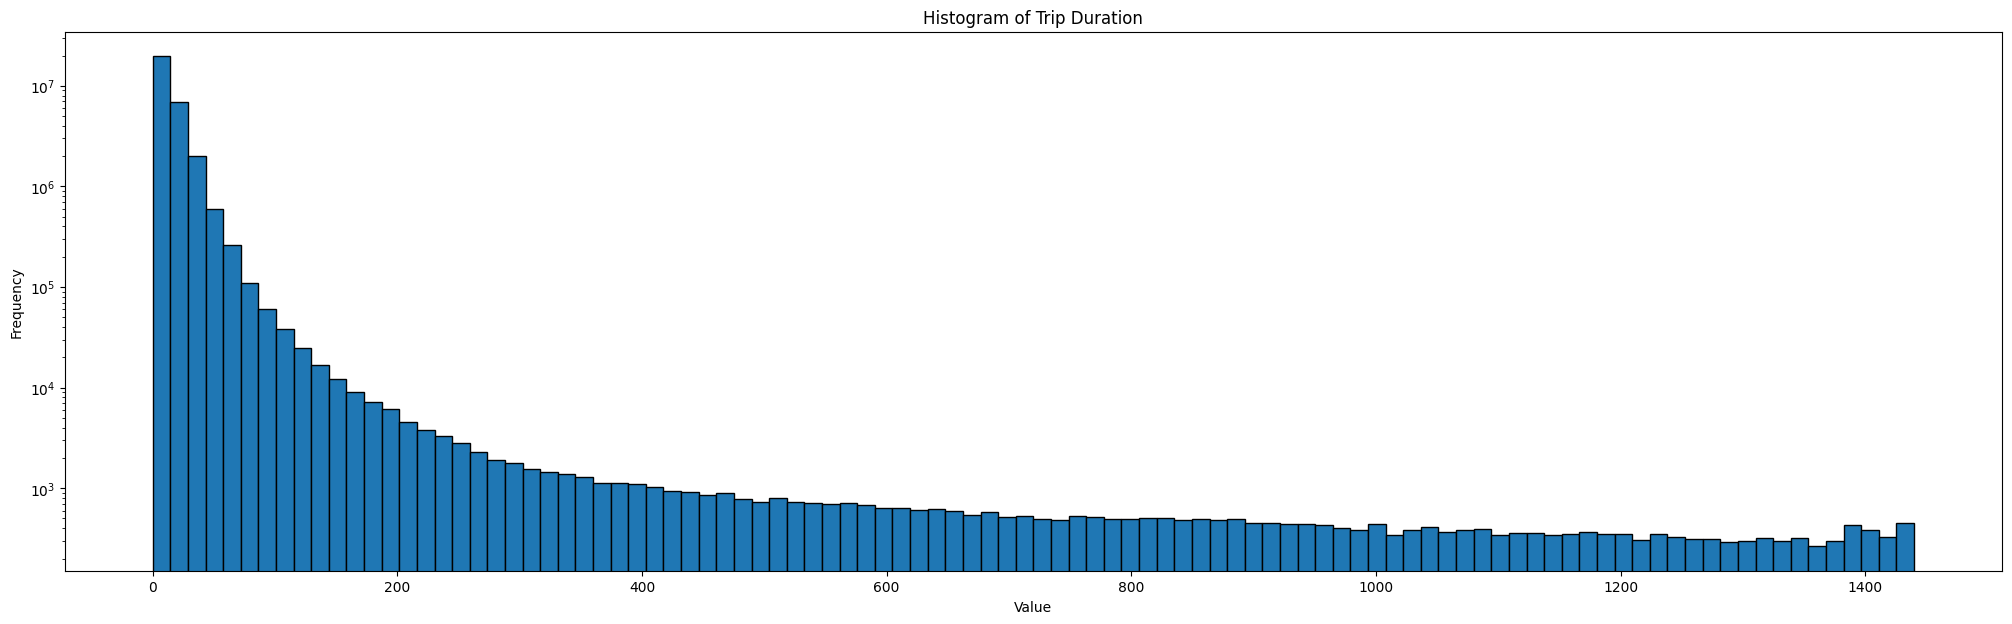

In [31]:
# Plot the histogram

plt.figure(figsize= (25, 7))
plt.hist(duration, bins=100, edgecolor='k') 
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.yscale("log")
plt.title('Histogram of Trip Duration')
plt.show()

Text(0.5, 1.0, 'Histogram with Density Curve')

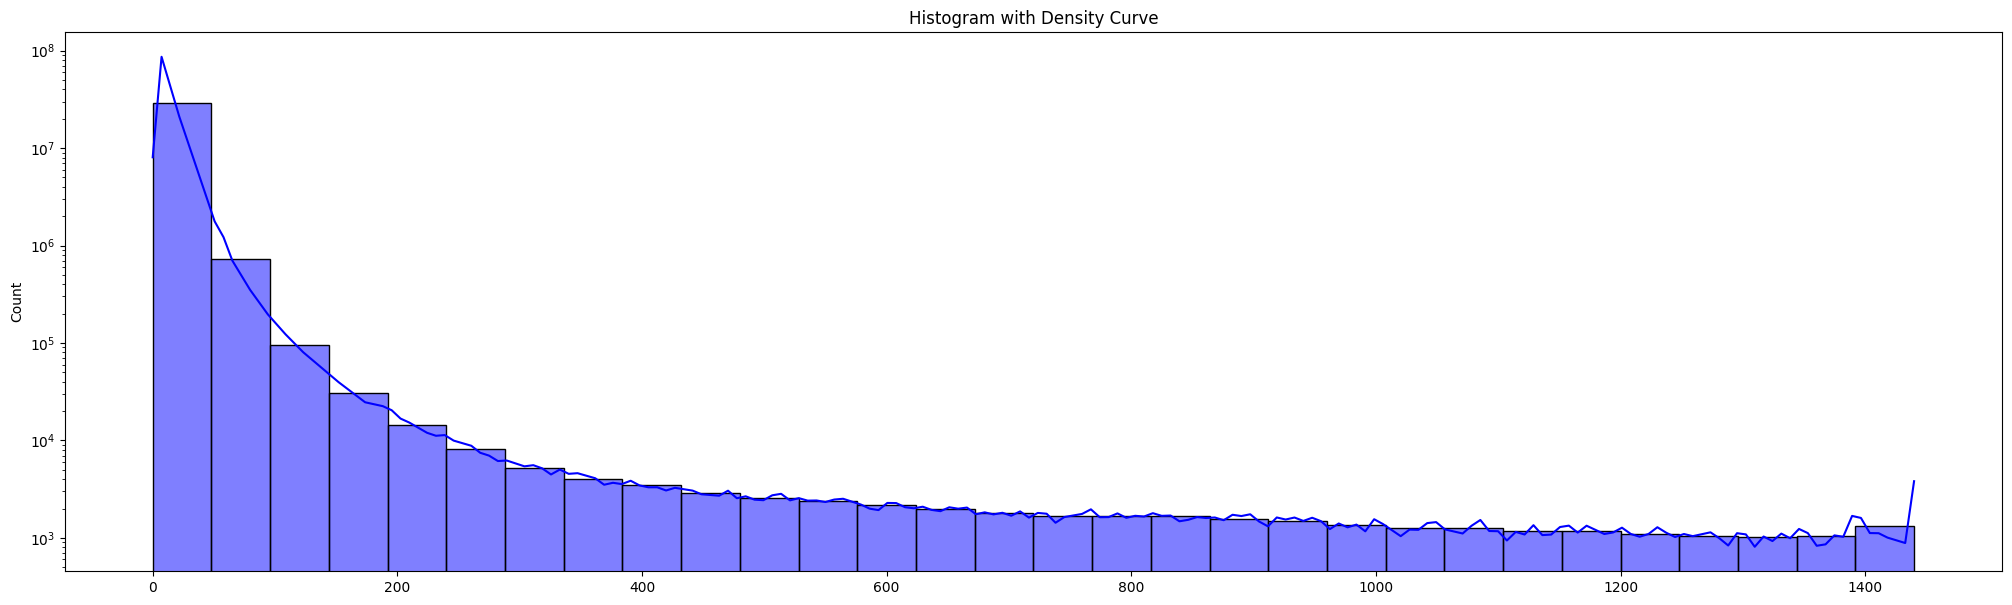

In [32]:
# Plot the histogram with a curve following the bins

data = duration

# Create histogram with density curve
plt.figure(figsize= (25, 7))
sns.histplot(data.values, kde=True, bins=30, color='b')
plt.yscale("log")
plt.title('Histogram with Density Curve')
#plt.show()

## Create a figure with 2 axis representing different plots: a bar chart with the usertype variable and a pie chart with the gender variable

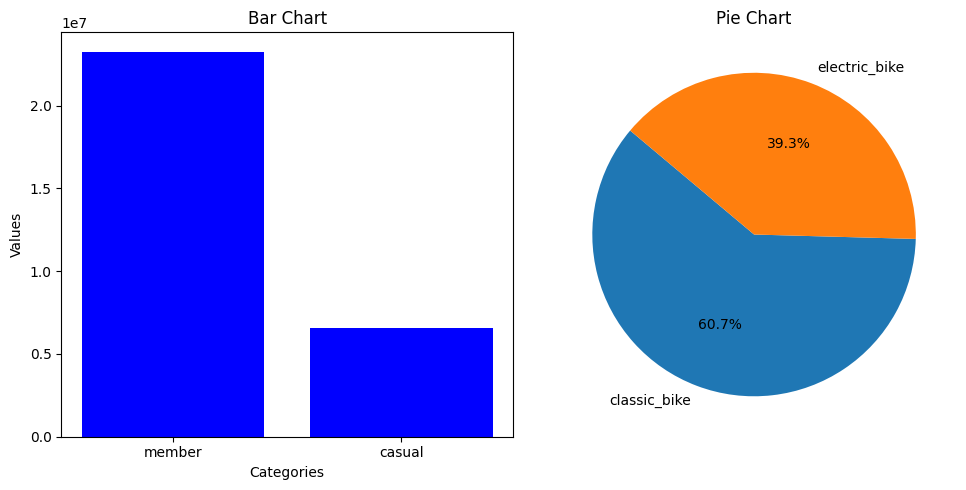

In [33]:
# Date for the bar chart

usertype = df_temp['member_casual'].value_counts()  # Get counts for member_casual
categories = list(usertype.index)  # Get the index (categories)
height = list(usertype.values)      # Get the counts (values)

# Data for the pie chart

gender = df_temp['rideable_type'].value_counts()  # Get counts for rideable_type
labels = gender.index.tolist()  # Get the unique labels
sizes = gender.values.tolist()   # Get the counts as sizes for pie chart

# Create a figure with two subplots

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Bar chart plot

ax1.bar(categories, height, color='blue') 
ax1.set_title('Bar Chart') 
ax1.set_xlabel('Categories') 
ax1.set_ylabel('Values')

# Pie chart plot

ax2.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140) 
ax2.set_title('Pie Chart')

# Display the plots

plt.tight_layout() 
plt.show()